In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("solubility.csv")
data

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [8]:
x = data.drop('logS', axis = 1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [6]:
y = data['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn import pred

In [12]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
train_predictions = lr.predict(x_train)
test_predictions = lr.predict(x_test)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
lr_train_mae = mean_squared_error(y_train,train_predictions)
lr_train_r2 = r2_score(y_train,train_predictions)

lr_test_mae = mean_squared_error(y_test,test_predictions)
lr_test_r2 = r2_score(y_test,test_predictions)

In [23]:
lr_train_mae

1.020188267896025

In [24]:
lr_train_r2

0.7633267009224406

In [25]:
lr_test_mae

0.9847407459292864

In [26]:
lr_test_r2

0.7900262943537391

In [29]:
lr_result = pd.DataFrame(['Linear Regression',lr_train_mae,lr_train_r2,lr_test_mae,lr_test_r2]).transpose()
lr_result.columns = ['Method','Training NSE','Training R2','Test NSE', 'Test R2']
lr_result

,Method,Training NSE,Training R2,Test NSE,Test R2
0,Linear Regression,1.020188,0.763327,0.984741,0.790026


In [30]:
from sklearn.ensemble import RandomForestRegressor


In [31]:
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [32]:
rf_train_predictions = lr.predict(x_train)
rf_test_predictions = lr.predict(x_test)

In [33]:
rf_train_mae = mean_squared_error(y_train,train_predictions)
rf_train_r2 = r2_score(y_train,train_predictions)

rf_test_mae = mean_squared_error(y_test,test_predictions)
rf_test_r2 = r2_score(y_test,test_predictions)

In [34]:
rf_train_mae

1.020188267896025

In [35]:
rf_train_r2

0.7633267009224406

In [36]:
rf_test_mae

0.9847407459292864

In [37]:
rf_test_r2

0.7900262943537391

In [38]:
rf_result = pd.DataFrame(['Linear Regression',rf_train_mae,rf_train_r2,rf_test_mae,rf_test_r2]).transpose()
rf_result.columns = ['Method','Training NSE','Training R2','Test NSE', 'Test R2']
rf_result

,Method,Training NSE,Training R2,Test NSE,Test R2
0,Linear Regression,1.020188,0.763327,0.984741,0.790026


In [46]:
df_model = pd.concat((lr_result, rf_result))
df_model

,Method,Training NSE,Training R2,Test NSE,Test R2
0,Linear Regression,1.020188,0.763327,0.984741,0.790026
0,Linear Regression,1.020188,0.763327,0.984741,0.790026


In [47]:
df_model.reset_index(drop = True)

,Method,Training NSE,Training R2,Test NSE,Test R2
0,Linear Regression,1.020188,0.763327,0.984741,0.790026
1,Linear Regression,1.020188,0.763327,0.984741,0.790026


In [55]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Predict Log')

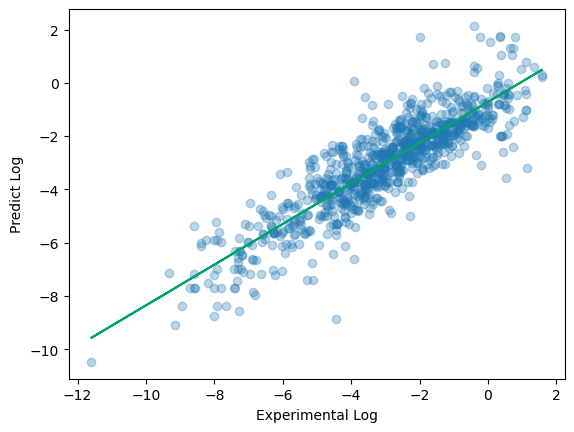

In [64]:
z= np.polyfit(y_train,rf_train_predictions,1)
p = np.poly1d(z)

plt.scatter(y_train,rf_train_predictions,alpha=0.3)

plt.plot(y_train, p(y_train), "#00A36C")
plt.xlabel("Experimental Log")
plt.ylabel("Predict Log")